# Iris Classification

Author: Dominik Chłodowicz\
Date: 2025-05-10\
Description: Classify Iris spiece based on sepal and petal dimensions using k-NN and Naive Bayes Classifier.

In [75]:
# Standard Import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Data import & cleanup

In [35]:
col_names = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width',
    'species' 
]

df = pd.read_csv(
    '../data/iris_data/iris.data',
    header=None,
    names=col_names
)

# checking for empty values
display(df.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Basic data info

In [34]:
display(df.shape)
display(df.columns)
display(df.head())
display(df['species'].value_counts())
display(df.groupby('species').describe())

(150, 5)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

## Data E&A

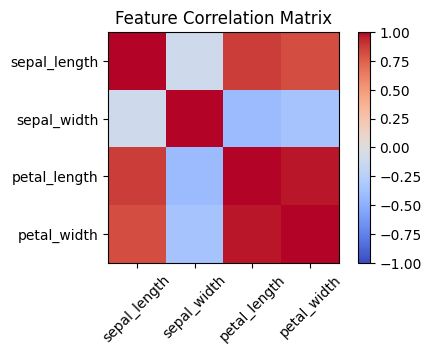

In [23]:
# Correlation matrix
corr = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

fig, ax = plt.subplots(figsize=(5,3))
im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45)
ax.set_yticks(range(len(corr.index)))
ax.set_yticklabels(corr.index)
fig.colorbar(im, ax=ax)
plt.title('Feature Correlation Matrix')
plt.show()

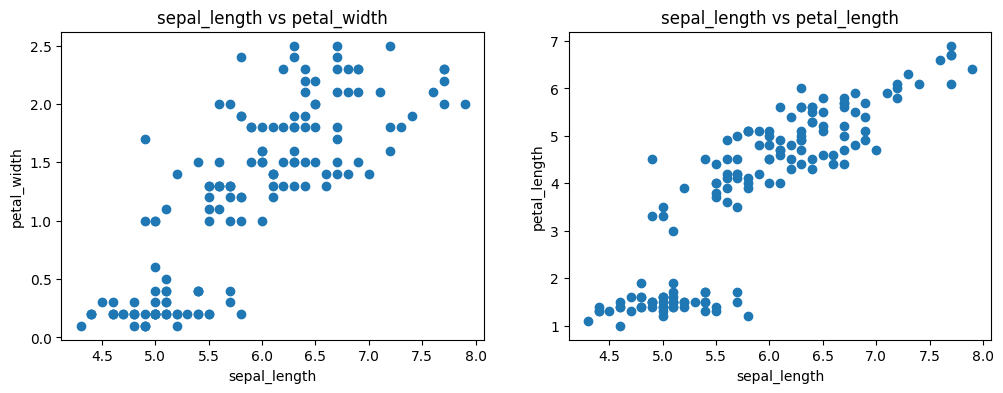

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(df['sepal_length'], df['petal_width'])
axes[0].set(title='sepal_length vs petal_width', xlabel='sepal_length', ylabel='petal_width')
axes[1].scatter(df['sepal_length'], df['petal_length'])
axes[1].set(title='sepal_length vs petal_length', xlabel='sepal_length', ylabel='petal_length')
plt.show()

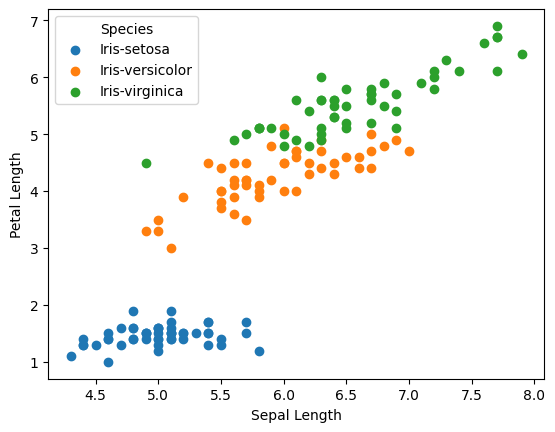

In [61]:
fig, ax = plt.subplots()

for name, group in df.groupby('species'):
    ax.scatter(group['sepal_length'], 
               group['petal_length'],
               label=name)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.legend(title='Species')
plt.show()

## Fitting k-NN, choosing k

In [107]:
# Features & target
x = df[['sepal_length','petal_length']]
y = df['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

k = 1

knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

knn_predict = knn.predict(x_test)

accuracy = accuracy_score(y_test, knn_predict)

accuracy

0.9555555555555556

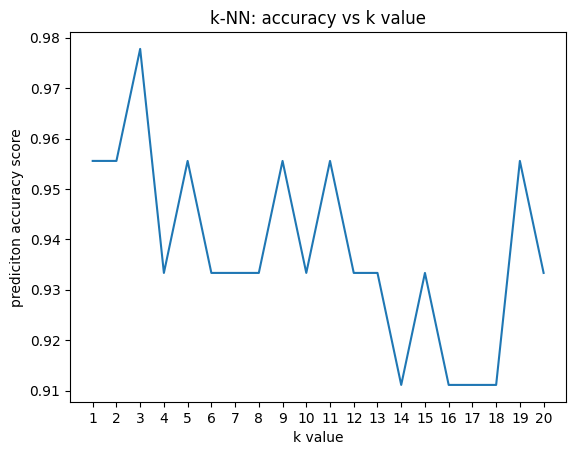

In [113]:
#plotting accuracy vs k value
k_values = []
accuracy_scores = []

# for or bias-variance plot
train_error = []
test_error = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    knn_predict_train = knn.predict(x_train)
    knn_predict_test = knn.predict(x_test)
    test_accuracy = accuracy_score(y_test, knn_predict_test)

    # for accuracy vs k value
    k_values.append(k)
    accuracy_scores.append(test_accuracy)

    # for bias-variance plot
    train_error.append(1 - accuracy_score(y_train, knn_predict_train))
    test_error.append(1 - test_accuracy)

fig, ax = plt.subplots()
ax.plot(k_values, accuracy_scores, )
ax.set(xticks=k_values, title='k-NN: accuracy vs k value', xlabel='k value', ylabel='prediciton accuracy score')
plt.show()

In [102]:
best_index = accuracy_scores.index(max(accuracy_scores))

best_k = k_values[best_index]

print(f"The highest accuracy is at index {best_index} (k = {best_k})")

The highest accuracy is at index 2 (k = 3)


## Plotting bias vs. variance

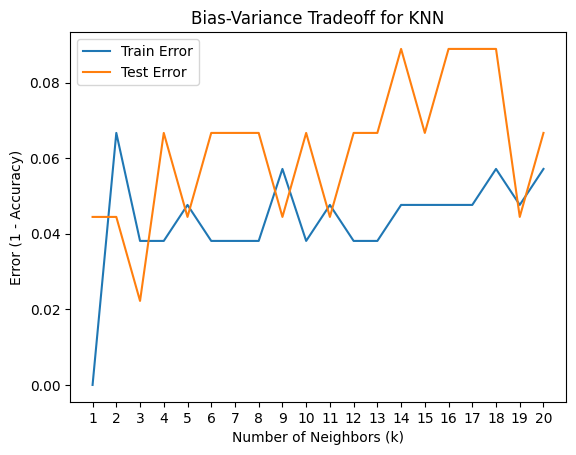

In [119]:
# Plotting the bias-variance tradeoff
fig, ax = plt.subplots()
ax.plot(k_values, train_error, label='Train Error')
ax.plot(k_values, test_error, label='Test Error')
ax.set(xticks=k_values, title='Bias-Variance Tradeoff for KNN', xlabel='Number of Neighbors (k)', ylabel='Error (1 - Accuracy)')
plt.legend()
plt.show()
